In [32]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.layers.normalization import BatchNormalization

In [20]:
data = pd.read_csv('BOD_biclass_139rdkit.csv')

In [21]:
data.head()

,SMILES,bod_class,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,...,0,0,0,2,0,0,0,0,0,0
1,CC(O)C(O)=O,1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,0,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,...,0,0,0,2,0,0,0,0,0,0
3,OC(=O)c1c(Cl)ccc(Cl)c1Cl,1,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,OCC(O)C(O)C(O)C(O)CO,1,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.shape

(1063, 141)

In [23]:
data_139 = data.iloc[:,2:141]

In [24]:
data_139.head()

,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,0.250000,2.0,...,0,0,0,2,0,0,0,0,0,0
1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,0.666667,0.0,...,0,0,0,0,0,0,0,0,0,0
2,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.142857,2.0,...,0,0,0,2,0,0,0,0,0,0
3,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.000000,1.0,...,0,0,0,1,0,0,0,0,0,0
4,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,1.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


#try to reduce the dimension to 20 by 1 layer of encoder and 1 layer of decoder

In [121]:
encoding_dim = 20
input_data = Input(shape = (139,))
normalized_data = BatchNormalization()(input_data)
encoded = Dense(encoding_dim,activation='relu')(normalized_data)
decoded = Dense(139,activation = 'sigmoid')(encoded)
autoencoder = Model(input_data,decoded)

configure the model

In [122]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse')

In [123]:
data_train = data_139.values


In [124]:
from keras.utils import normalize

In [125]:
mol_weight = data_train.transpose()[0]

In [126]:
normalize(mol_weight)

array([[0.02885562, 0.01119384, 0.04375433, ..., 0.05172911, 0.03906561,
        0.01990682]])

In [127]:
norm_train = normalize(data_train, axis=0, order=2)

In [128]:
norm_train

array([[0.02885562, 0.04750929, 0.03996006, ..., 0.        , 0.        ,
        0.        ],
       [0.01119384, 0.02850557, 0.03996006, ..., 0.        , 0.        ,
        0.        ],
       [0.04375433, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05172911, 0.07601486, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03906561, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01990682, 0.02850557, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [129]:
norm_train.shape

(1063, 139)

In [130]:
history = autoencoder.fit(norm_train,norm_train,epochs= 300,batch_size=256,shuffle=True)

Epoch 1/300
1063/1063 [==============================] - 1s 1ms/step - loss: 0.2394
Epoch 2/300
1063/1063 [==============================] - 0s 41us/step - loss: 0.2346
Epoch 3/300
1063/1063 [==============================] - 0s 39us/step - loss: 0.2298
Epoch 4/300
1063/1063 [==============================] - 0s 40us/step - loss: 0.2248
Epoch 5/300
1063/1063 [==============================] - 0s 40us/step - loss: 0.2196
Epoch 6/300
1063/1063 [==============================] - 0s 39us/step - loss: 0.2140
Epoch 7/300
1063/1063 [==============================] - 0s 41us/step - loss: 0.2078
Epoch 8/300
1063/1063 [==============================] - 0s 40us/step - loss: 0.2008
Epoch 9/300
1063/1063 [==============================] - 0s 40us/step - loss: 0.1928
Epoch 10/300
1063/1063 [==============================] - 0s 41us/step - loss: 0.1837
Epoch 11/300
1063/1063 [==============================] - 0s 40us/step - loss: 0.1734
Epoch 12/300
1063/1063 [==============================] - 0s 40u

1063/1063 [==============================] - 0s 41us/step - loss: 8.6568e-04
Epoch 96/300
1063/1063 [==============================] - 0s 40us/step - loss: 8.5778e-04
Epoch 97/300
1063/1063 [==============================] - 0s 40us/step - loss: 8.4668e-04
Epoch 98/300
1063/1063 [==============================] - 0s 40us/step - loss: 8.3786e-04
Epoch 99/300
1063/1063 [==============================] - 0s 40us/step - loss: 8.4126e-04
Epoch 100/300
1063/1063 [==============================] - 0s 40us/step - loss: 8.2524e-04
Epoch 101/300
1063/1063 [==============================] - 0s 41us/step - loss: 8.2111e-04
Epoch 102/300
1063/1063 [==============================] - 0s 39us/step - loss: 8.3566e-04
Epoch 103/300
1063/1063 [==============================] - 0s 39us/step - loss: 8.2993e-04
Epoch 104/300
1063/1063 [==============================] - 0s 39us/step - loss: 8.0425e-04
Epoch 105/300
1063/1063 [==============================] - 0s 39us/step - loss: 8.0840e-04
Epoch 106/300
106

1063/1063 [==============================] - 0s 40us/step - loss: 6.9168e-04
Epoch 186/300
1063/1063 [==============================] - 0s 39us/step - loss: 6.9679e-04
Epoch 187/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.9690e-04
Epoch 188/300
1063/1063 [==============================] - 0s 42us/step - loss: 6.9510e-04
Epoch 189/300
1063/1063 [==============================] - 0s 41us/step - loss: 6.9443e-04
Epoch 190/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.9051e-04
Epoch 191/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.9104e-04
Epoch 192/300
1063/1063 [==============================] - 0s 39us/step - loss: 6.9485e-04
Epoch 193/300
1063/1063 [==============================] - 0s 38us/step - loss: 6.8445e-04
Epoch 194/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.8984e-04
Epoch 195/300
1063/1063 [==============================] - 0s 39us/step - loss: 6.8745e-04
Epoch 196/300

1063/1063 [==============================] - 0s 40us/step - loss: 6.6541e-04
Epoch 276/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.6278e-04
Epoch 277/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.6370e-04
Epoch 278/300
1063/1063 [==============================] - 0s 41us/step - loss: 6.6322e-04
Epoch 279/300
1063/1063 [==============================] - 0s 39us/step - loss: 6.6480e-04
Epoch 280/300
1063/1063 [==============================] - 0s 39us/step - loss: 6.6614e-04
Epoch 281/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.6657e-04
Epoch 282/300
1063/1063 [==============================] - 0s 39us/step - loss: 6.6373e-04
Epoch 283/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.6300e-04
Epoch 284/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.6331e-04
Epoch 285/300
1063/1063 [==============================] - 0s 40us/step - loss: 6.6412e-04
Epoch 286/300

In [131]:
print(history.history.keys())

dict_keys(['loss'])


In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

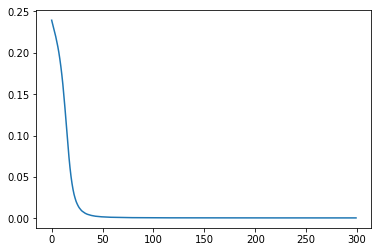

In [133]:
plt.plot(history.history['loss'])